# Introduction

In this project, we investigate which species have been observed across four different national parks and how each species is classified according to its conservation status. We will also explore general trends—such as which categories of species appear most at risk and how frequently different species are observed in each park.


# Data Exploration

The dataset used in this analysis comes from Codecademy. It consists of two CSV files: **`observations.csv`** and **`species_info.csv`**. For easier manipulation, we will merge these two files using the species’ scientific names as the key.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Load observations dataset 
df_observations = pd.read_csv('observations.csv')

# Load species info dataset
df_species = pd.read_csv('species_info.csv')

# Merge datasets on scientific name
df_merged = pd.merge(df_observations, df_species, on='scientific_name')

print(df_merged.head())
print(df_merged.info())
print(df_merged.describe())
print(df_merged.isnull().sum())
print(df_merged.columns.tolist())

#print different conservation statuses
print("\n" + "="*70 + "\n")
print(df_merged['conservation_status'].value_counts())

print("\n" + "="*70 + "\n")
print(df_merged['category'].value_counts())

# Top 5 categories with highest number of endangered species
endangered_counts = df_merged[df_merged['conservation_status'] == 'Endangered']['category'].value_counts().head(5)
print("\n" + "="*70 + "\n")
print("Top 5 Categories with Highest Number of Endangered Species:")
print(endangered_counts)

#Species of Concern
concerned_counts = df_merged[df_merged['conservation_status'] == 'Species of Concern']['category'].value_counts().head(5)
print("\n" + "="*70 + "\n")
print("Top 5 Categories with Highest Number of Concerned Species:")
print(concerned_counts)

#Threatened Species
threatened_counts = df_merged[df_merged['conservation_status'] == 'Threatened']['category'].value_counts().head(5)
print("\n" + "="*70 + "\n")
print("Top 5 Categories with Highest Number of Threatened Species:")
print(threatened_counts)

#In recovery Species
recovery_counts = df_merged[df_merged['conservation_status'] == 'In Recovery']['category'].value_counts().head(5)
print("\n" + "="*70 + "\n")
print("Top 5 Categories with Highest Number of Species in Recovery:")
print(recovery_counts)

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
<class 'pandas.core.

During the initial exploration, we notice that the `conservation_status` column contains several missing values. This is likely because many species are not currently classified under any endangered category. This observation suggests that additional data cleaning and investigation are needed.

A preliminary overview of the dataset shows that **vascular plants** (plants with specialized fluid-transport systems such as xylem and phloem) make up the majority of observations. Birds represent the second-largest group, while reptiles appear far less frequently.


# Visualization

To better understand patterns in the data, we will create several visualizations. These will help reveal trends in species classification, conservation status, and observation counts across the four national parks.

C:\Users\julia\AppData\Local\Temp\ipykernel_12108\1268758018.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='conservation_status', y='observations', ax=axes[1, 1], palette='Set3')


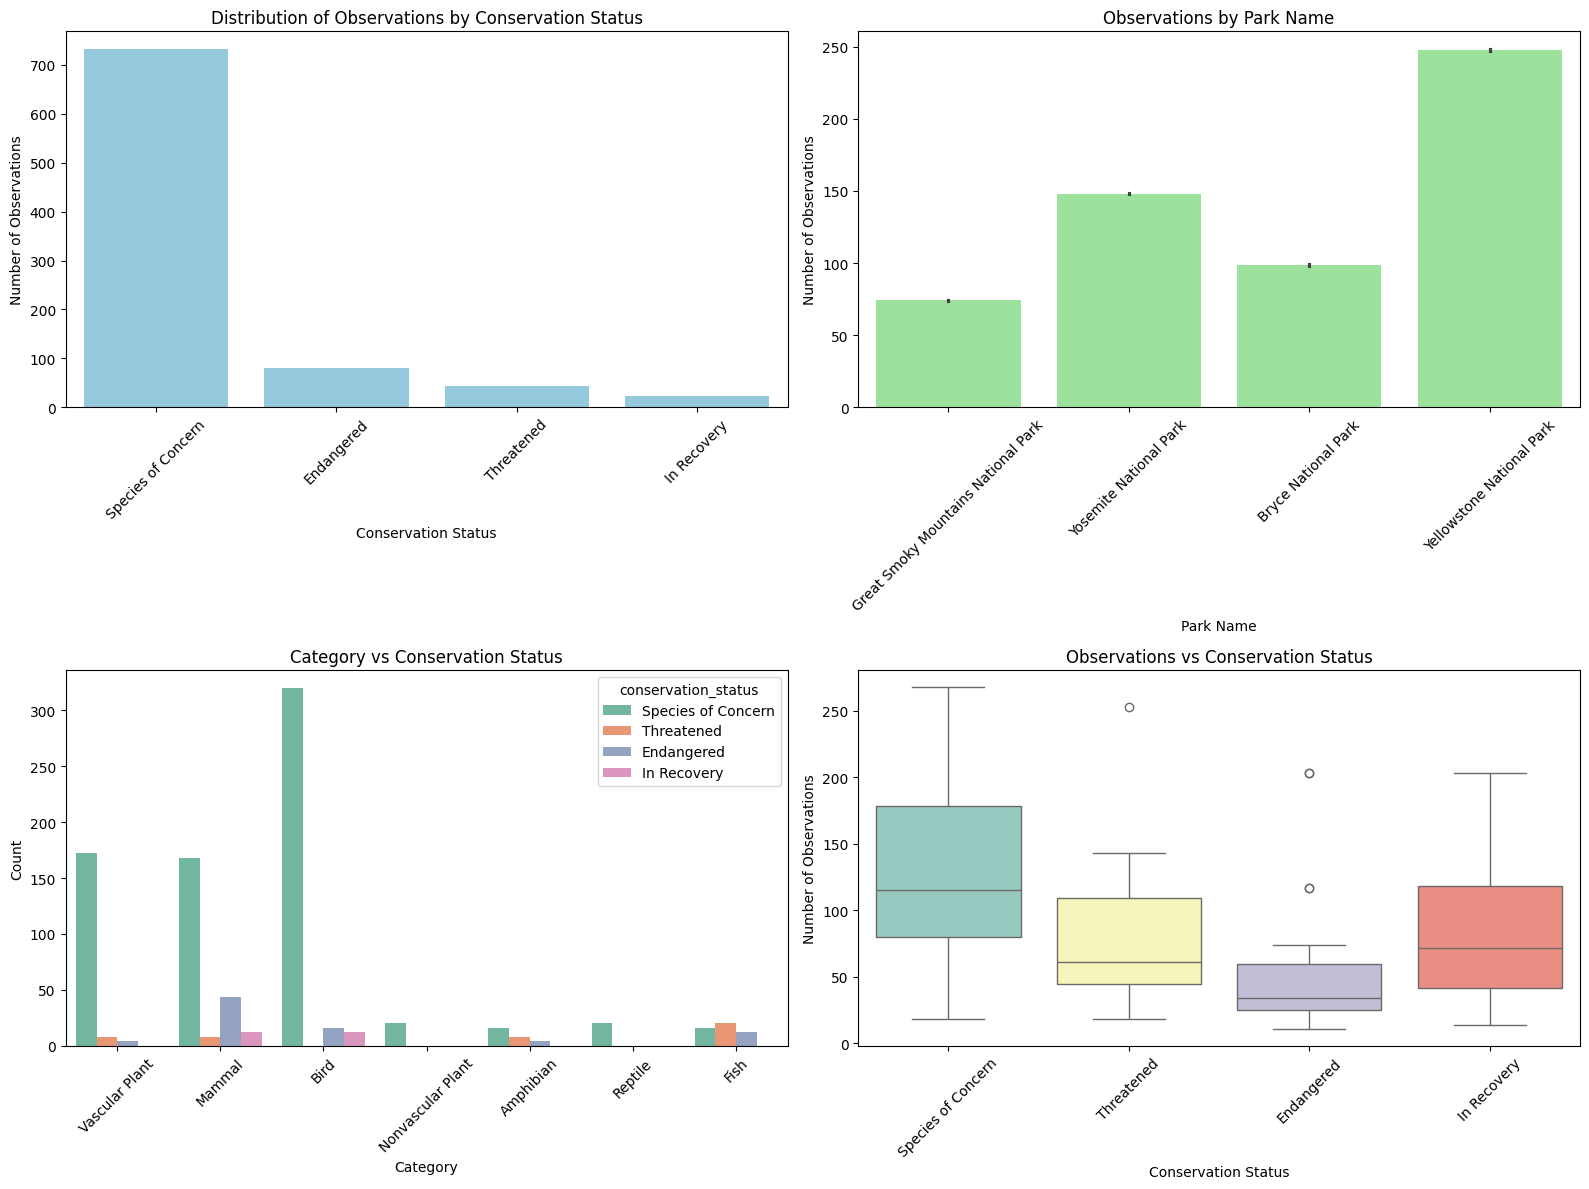

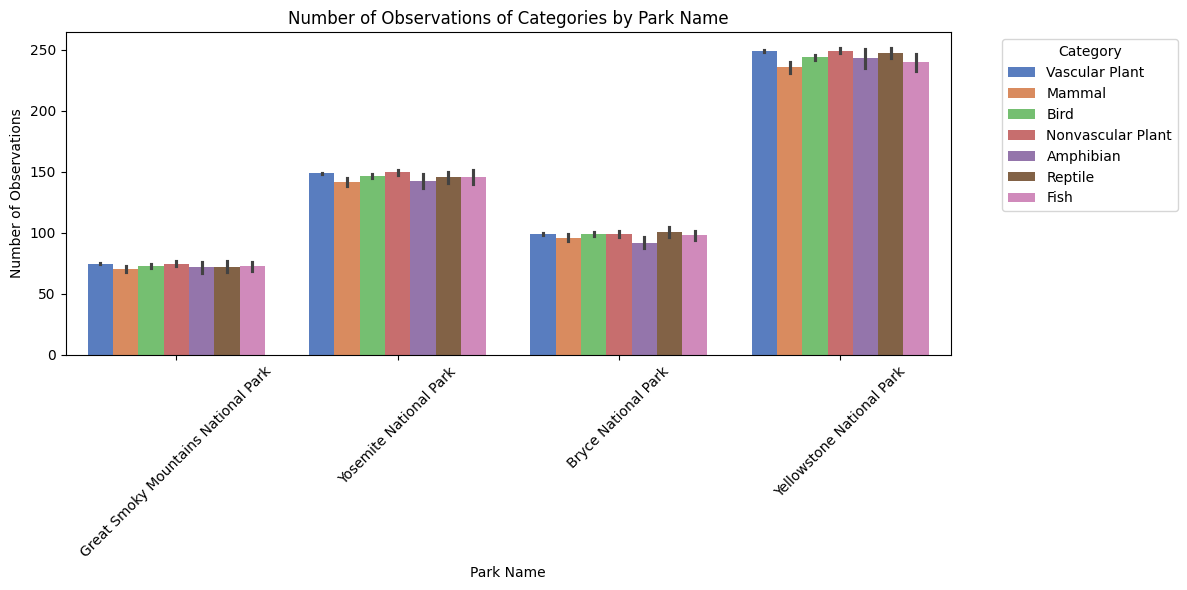

In [11]:
# Create a figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of observations by conservation status
sns.countplot(data=df_merged, x='conservation_status', 
              order=df_merged['conservation_status'].value_counts().index, 
              ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Observations by Conservation Status')
axes[0, 0].set_xlabel('Conservation Status')
axes[0, 0].set_ylabel('Number of Observations')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Observations by park name
sns.barplot(data=df_merged, x='park_name', y='observations', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Observations by Park Name')
axes[0, 1].set_xlabel('Park Name')
axes[0, 1].set_ylabel('Number of Observations')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Category vs Conservation Status
sns.countplot(data=df_merged, x='category', hue='conservation_status', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Category vs Conservation Status')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Observations vs conservation status (boxplot)
sns.boxplot(data=df_merged, x='conservation_status', y='observations', ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Observations vs Conservation Status')
axes[1, 1].set_xlabel('Conservation Status')
axes[1, 1].set_ylabel('Number of Observations')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Plot 5: Number of observations of catergories by park name
plt.figure(figsize=(12, 6))
sns.barplot(data=df_merged, x='park_name', y='observations', hue='category', palette='muted')
plt.title('Number of Observations of Categories by Park Name')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Conclusion

This analysis of biodiversity data from four national parks reveals several key insights into species observations and conservation status. Yellowstone National Park stands out with the highest number of observations, indicating its rich biodiversity or perhaps more intensive monitoring efforts. Vascular plants dominate the observations, comprising the majority of recorded species, followed by birds, while reptiles are the least observed.

In terms of conservation, most species are not classified under any endangered category, suggesting a relatively stable baseline. However, among those that are at risk, birds have the highest number of "Species of Concern," highlighting their vulnerability. Mammals, on the other hand, lead in the number of endangered species, underscoring the need for targeted conservation efforts for this group.

The visualizations further illustrate these patterns, showing variations in observation counts across parks and categories, as well as the distribution of conservation statuses. This data underscores the importance of continued monitoring and conservation initiatives to protect biodiversity in national parks, particularly for vulnerable species like mammals and birds.